<a href="https://colab.research.google.com/github/jjp422/nyu-python-public-policy/blob/master/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [105]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ind_per_cd = pd.read_csv('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv', header = 'infer')

In [108]:
ind_per_cd.head()

,the_geom,lots_parking,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,cartodb_id,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,NaN,23,NaN,976.3,American Community Survey 2013-2017 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.5,101,man01@cb.nyc.gov,www1.nyc.gov/site/manhattancb1/index.page,Manhattan Community District 1,Manhattan CD 1,http://www1.nyc.gov/assets/planning/download/p...,1729,39547,7,1,28,22,1099,25961,96515,15.634252,15.7,11.8,1.1,2.4,4.2,7.3,6.6,4.7,3.5,2.9,1.8,2.2,2.3,2.5,2.3,1.7,1.0,0.7,1.1,2.6,1.78,678,0.284774,2164,121000.0,4900,0.041,0.220593,7599,0.644822,16733,0.353232,7367,19061,2.53,1036,0.284528,2913,118000.0,6272,0.042,0.241982,10238,0.612620,29221,0.350056,8750,28097,5.8,15.5,23.1,7865158,252207,4271043,1453796,5345624,433550,10274554,45535,1746495,185913,4107387,134060,343,78,578,25,11,1,69,33,167,65,1448,33,23,1.4,1.9,2.5,6.0,6.7,5.7,3.7,3.3,1.7,2.8,2.5,2.7,1.9,1.2,0.8,0.7,0.7,2.9,25.2,31.8,40.8,1.0,0.3,0.2,1.1,1.6,0.5,0.3,0.6,0.3,0.1,0.5,0.2,0.1,0.7,0.1,0.1,0.7,0.6,0.1,0.1,0.1,0.2,0.3,"Battery Park City, Civic Center, 

In [0]:
kids_per_cd = ind_per_cd[['borocd','under18_rate']]

In [138]:
kids_per_cd.head()

,borocd,under18_rate
0,101,12.8
1,102,12.8
2,103,11.7
3,104,8.2
4,105,8.2


In [111]:
noise_residential = df[df['complaint_type'] == 'Noise - Residential']
noise_residential.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
11,11,11,39883376,08/01/2018 12:04:41 AM,08/01/2018 03:38:54 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0
16,16,16,39886233,08/01/2018 12:06:29 AM,08/01/2018 02:54:24 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0
17,17,17,39881426,08/01/2018 12:06:42 AM,08/01/2018 04:00:03 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0
18,18,18,39880309,08/01/2018 12:06:51 AM,08/01/2018 04:54:26 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0


In [119]:
noise_residential = noise_residential[['complaint_type','borocd']]
noise_residential.head(20)

,complaint_type,borocd
2,Noise - Residential,308.0
11,Noise - Residential,204.0
16,Noise - Residential,414.0
17,Noise - Residential,204.0
18,Noise - Residential,303.0
25,Noise - Residential,206.0
31,Noise - Residential,401.0
36,Noise - Residential,303.0
39,Noise - Residential,301.0
42,Noise - Residential,404.0


I expect to find that community districts with a greater percentage of children under 18 are more likely to make noise complaints due to families' increased sensitivity to the sleeping and resting needs of children. However, I could also imagine that neighborhoods that are popular with families are quieter during typical noise complaint times.

In [120]:
counts_311 = noise_residential.groupby('borocd').size().reset_index(name='noise_complaints')
counts_311.head(20)

,borocd,noise_complaints
0,101.0,722
1,102.0,1837
2,103.0,6272
3,104.0,2702
4,105.0,741
5,106.0,2078
6,107.0,4297
7,108.0,2283
8,109.0,4586
9,110.0,7659


In [142]:
merged_df = pd.merge(how='left',left=kids_per_cd, right=counts_311, left_on='borocd', right_on='borocd')
merged_df = merged_df.fillna(0)
merged_df = merged_df.drop_duplicates()
merged_df.head(60)

,borocd,under18_rate,noise_complaints
0,101,12.8,722
1,102,12.8,1837
2,103,11.7,6272
3,104,8.2,2702
4,105,8.2,741
5,106,8.7,2078
6,107,15.1,4297
7,108,14.8,2283
8,109,15.4,4586
9,110,20.3,7659


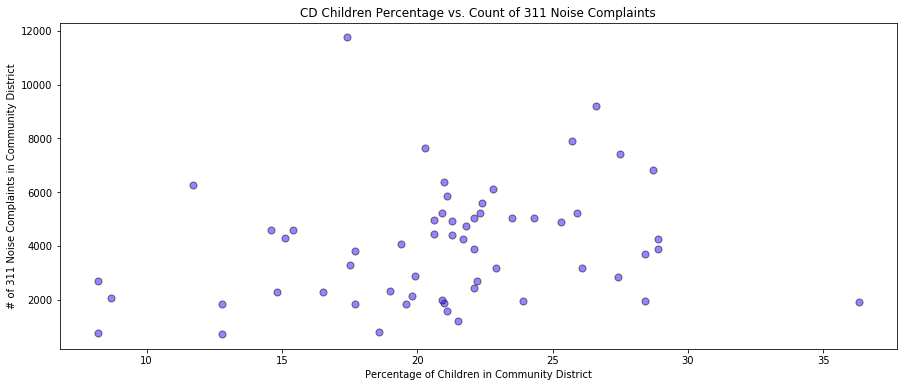

In [141]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_df.under18_rate),
    np.array(merged_df.noise_complaints), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('CD Children Percentage vs. Count of 311 Noise Complaints')
plt.xlabel('Percentage of Children in Community District')
plt.ylabel('# of 311 Noise Complaints in Community District')

plt.show()

In [143]:
y = merged_df.noise_complaints

x = merged_df.under18_rate
# let's add a y intercept to our model
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       noise_complaints   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.114
Date:                Thu, 19 Dec 2019   Prob (F-statistic):             0.0830
Time:                        21:27:29   Log-Likelihood:                -535.22
No. Observations:                  59   AIC:                             1074.
Df Residuals:                      57   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2079.4540   1121.405      1.854   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The R-squared is almost 0 meaning that almost no variance in the number of noise complaints is explained by the percentage of children in a neighborhood.

In [144]:
model.params

label = 'y = ' + str(round(model.params[0],2)) + ' + ' + str(round(model.params[1],2)) + 'x'
print(label)

y = 2079.45 + 91.55x


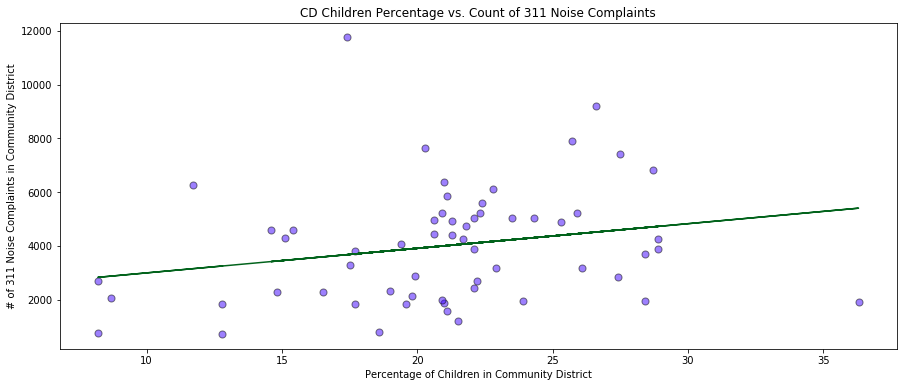

In [145]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_df.under18_rate),
    np.array(merged_df.noise_complaints), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.plot(
    np.array(merged_df.under18_rate), 
    model.params[0] +  model.params[1]*np.array(merged_df.under18_rate),
    c='#02631c', # darker green
    label=label)

plt.title('CD Children Percentage vs. Count of 311 Noise Complaints')
plt.xlabel('Percentage of Children in Community District')
plt.ylabel('# of 311 Noise Complaints in Community District')

plt.show()

My scatterplot makes it appear as if there is a very slight positive relationship between the percentage of children in a community district and the number of noise complaints. However, upon closer inspection, the line of best fit only touches a few community districts, and the R2 of the model is almost 0. I conclude that there are other omitted variables that predict noise complaints and perhaps predict the percentage of children in a community district.